<a href="https://colab.research.google.com/github/waelrash1/time_series_forecasting_dt302-2/blob/main/Trend_seasonal-Estimation_lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading data from a file

In [1]:
url='https://raw.githubusercontent.com/waelrash1/time_series_forecasting_dt302-2/main/AvTempAtlanta.txt'

data = read.table(url,header=T)


In [2]:
head(data)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5,61.8
2,1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1,62.3
3,1881,40.1,46.6,49.1,59.1,70.8,77.8,81.1,78.8,75.5,67.2,52.6,49.6,62.4
4,1882,48.8,52.4,57.4,64.8,66.1,76.6,75.9,75.8,71.7,65.8,51.1,41.4,62.3
5,1883,43.0,50.2,50.2,61.6,67.4,76.4,80.1,76.2,71.3,66.0,53.7,48.0,62.0
6,1884,35.9,51.7,54.4,58.4,70.7,71.1,77.7,75.3,74.9,68.1,51.3,44.5,61.2


In [3]:
# Remove first and last columns and then transpose the data set and then converted to a vector 
temp = as.vector(t(data[,-c(1,14)]))


In [4]:
head(temp)

[1] 44.3 43.7 57.6 58.9 69.8 74.9

In [5]:
#convert it to time series ts object with starting year 1879 and frequency 12 month
temp = ts(temp,start=1879,frequency=12)

In [6]:
#print the top 10 values
head(temp,10)
#temp

[1] 44.3 43.7 57.6 58.9 69.8 74.9 79.6 73.9 68.7 64.3

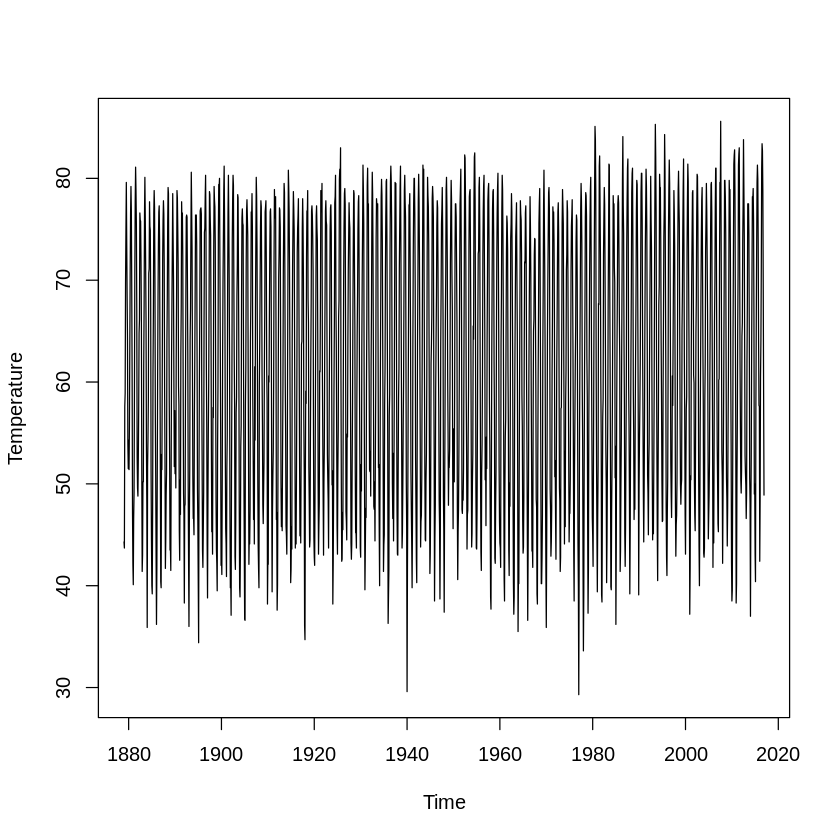

In [ ]:
ts.plot(temp,ylab="Temperature")

# Trend Analysis

## 1- Estimate trend using moving average

In [7]:
time.pts = c(1:length(temp))

In [8]:
time.pts

[1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182
 [183]  183  184  185  186  187  188  189  190  191  192  193  194  195  196
 [197]  197  198  199  200  201  202  203  204  205  206  207  208  209  210
 [211]  211  212  213  214  215  216  217  218  219  220  221  222  223  224
 [225]  225  226  227  228  229  230  231  232  233  234  235  236  237  238
 [239]  239  240  241  242  243  244  245  246  247  248  249  250  251  252
 [253]  253  254  255  256  257  258  259  260  261  262  263  264  265  266
 [267]  267  268  269  270  271  272  273  274  275  276  277  278  279  280
 [281]  281  282  283  284  285  286  287  288  289  290  291  292  293  294
 [295]  295  296  297  298  299  300  301  302  303  304  305  306  307  308
 [309]  309  310  311  312  313  314  315  316  317  318  319  320  321  322
 [323]  323  324  325  326  327  328  329  330  331  332  333  334  335  336
 [337]  337  338  339  340  341  342  343  344  345  346  347  348  349  350
 [351]  351  352  353  354  355  356  357  358  359  360  361  362  363  364
 [365]  365  366  367  368  369  370  371  372  373  374  375  376  377  378
 [379]  379  380  381  382  383  384  385  386  387  388  389  390  391  392
 [393]  393  394  395  396  397  398  399  400  401  402  403  404  405  406
 [407]  407  408  409  410  411  412  413  414  415  416  417  418  419  420
 [421]  421  422  423  424  425  426  427  428  429  430  431  432  433  434
 [435]  435  436  437  438  439  440  441  442  443  444  445  446  447  448
 [449]  449  450  451  452  453  454  455  456  457  458  459  460  461  462
 [463]  463  464  465  466  467  468  469  470  471  472  473  474  475  476
 [477]  477  478  479  480  481  482  483  484  485  486  487  488  489  490
 [491]  491  492  493  494  495  496  497  498  499  500  501  502  503  504
 [505]  505  506  507  508  509  510  511  512  513  514  515  516  517  518
 [519]  519  520  521  522  523  524  525  526  527  528  529  530  531  532
 [533]  533  534  535  536  537  538  539  540  541  542  543  544  545  546
 [547]  547  548  549  550  551  552  553  554  555  556  557  558  559  560
 [561]  561  562  563  564  565  566  567  568  569  570  571  572  573  574
 [575]  575  576  577  578  579  580  581  582  583  584  585  586  587  588
 [589]  589  590  591  592  593  594  595  596  597  598  599  600  601  602
 [603]  603  604  605  606  607  608  609  610  611  612  613  614  615  616
 [617]  617  618  619  620  621  622  623  624  625  626  627  628  629  630
 [631]  631  632  633  634  635  636  637  638  639  640  641  642  643  644
 [645]  645  646  647  648  649  650  651  652  653  654  655  656  657  658
 [659]  659  660  661  662  663  664  665  666  667  668  669  670  671  672
 [673]  673  674  675  676  677  678  679  680  681  682  683  684  685  686
 [687]  687  688  689  690  691  692  693  694  695  696  697  698  699  700
 [701]  701  702  703  704  705  706  707  708  709  710  711  712  713  714
 [715]  715  716  717  718  719  720  721  722  723  724  725  726  727  728

In [10]:
# standarise the data in range 0-1
time.pts = c(time.pts - min(time.pts))/max(time.pts)

In [11]:
head(time.pts,30)

[1] 0.0000000000 0.0006038647 0.0012077295 0.0018115942 0.0024154589
 [6] 0.0030193237 0.0036231884 0.0042270531 0.0048309179 0.0054347826
[11] 0.0060386473 0.0066425121 0.0072463768 0.0078502415 0.0084541063
[16] 0.0090579710 0.0096618357 0.0102657005 0.0108695652 0.0114734300
[21] 0.0120772947 0.0126811594 0.0132850242 0.0138888889 0.0144927536
[26] 0.0150966184 0.0157004831 0.0163043478 0.0169082126 0.0175120773

In [13]:
## Fit a moving average 
mav.fit = ksmooth(time.pts, temp, kernel = "box")

In [14]:
head(mav.fit$y,20)

[1] 61.14145 61.18341 61.20552 61.20263 61.18759 61.15119 61.11259 61.06991
 [9] 61.04066 61.04222 61.06612 61.11244 61.15457 61.19112 61.21492 61.21767
[17] 61.19698 61.14861 61.10346 61.06820

In [15]:
temp.fit.mav = ts(mav.fit$y,start=1879,frequency=12)

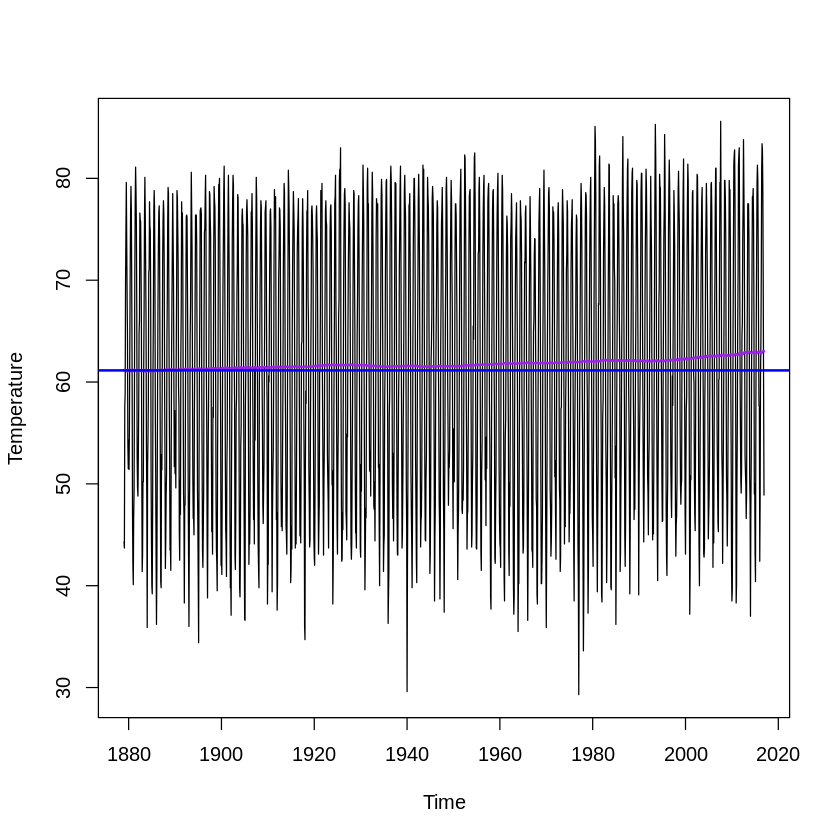

In [16]:
ts.plot(temp,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

## 2- Parametric Regression  (Quadratic Poly)

In [17]:
x1 = time.pts # t
x2 = time.pts^2 #t^2

In [19]:
lm.fit = lm(temp~x1+x2)
summary(lm.fit)


Call:
lm(formula = temp ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.770 -11.886   0.514  13.418  22.942 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.4247     0.9841  62.420   <2e-16 ***
x1           -1.5723     4.5481  -0.346    0.730    
x2            3.4937     4.4062   0.793    0.428    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.36 on 1653 degrees of freedom
Multiple R-squared:  0.002098,	Adjusted R-squared:  0.0008903 
F-statistic: 1.737 on 2 and 1653 DF,  p-value: 0.1763


In [20]:
temp.fit.lm = ts(fitted(lm.fit),start=1879,frequency=12)

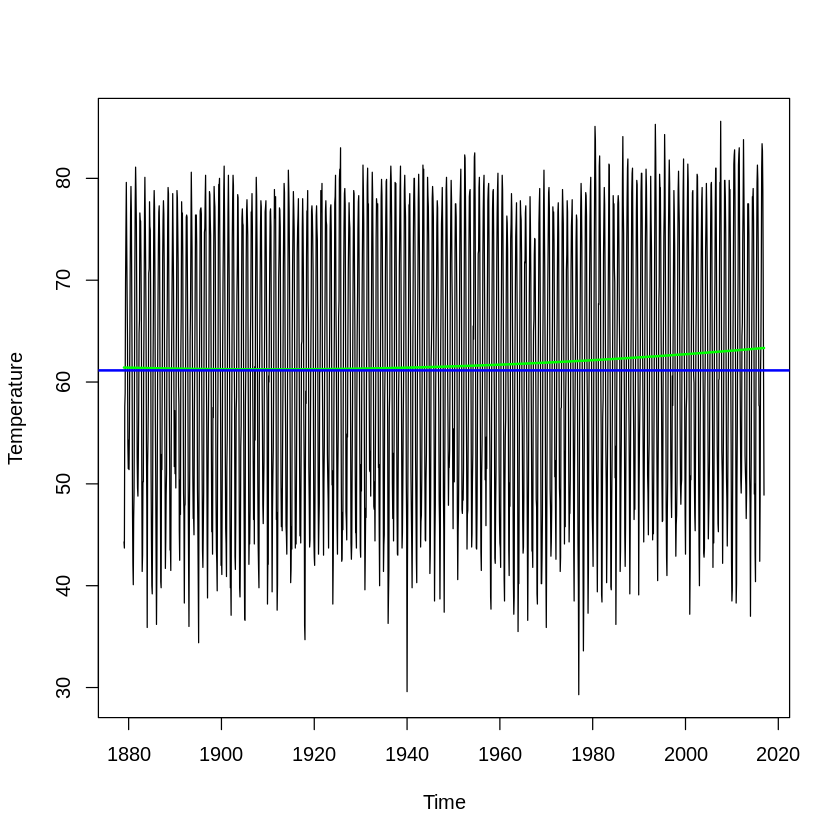

In [21]:
ts.plot(temp,ylab="Temperature")
lines(temp.fit.lm,lwd=2,col="green")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

# # 3- Non-parametric Regression

In [22]:
## Fit a trend using non-parametric regression
## Local Polynomial Trend Estimation
loc.fit = loess(temp~time.pts)
temp.fit.loc = ts(fitted(loc.fit),start=1879,frequency=12)


Loading required package: nlme

This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.



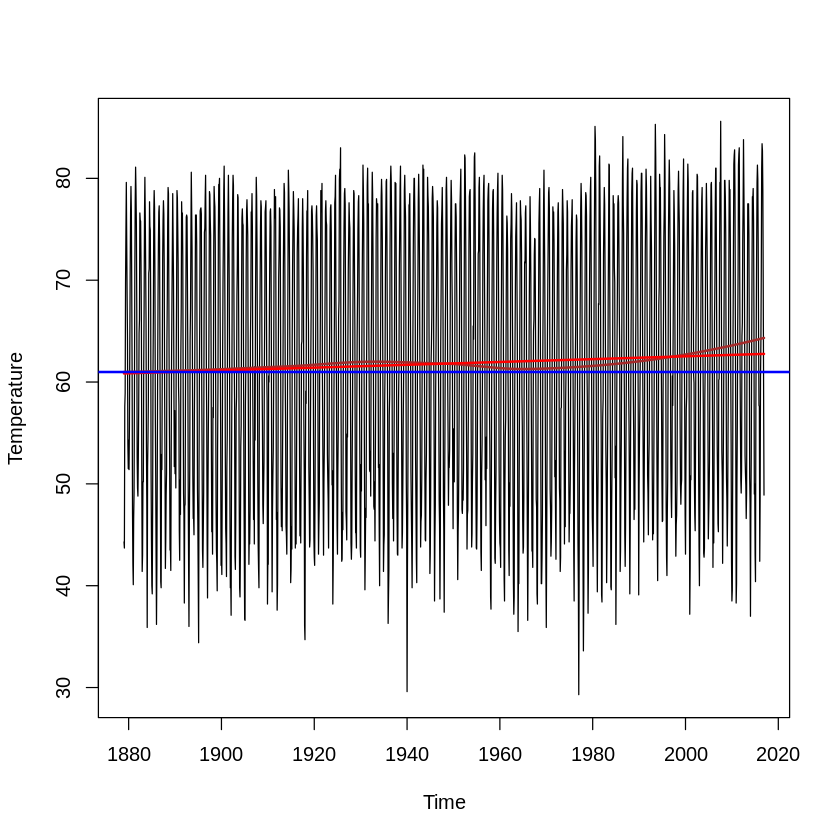

In [23]:
## Splines Trend Estimation
library(mgcv)
gam.fit = gam(temp~s(time.pts))
temp.fit.gam = ts(fitted(gam.fit),start=1879,frequency=12)
## Is there a trend? 
ts.plot(temp,ylab="Temperature")
lines(temp.fit.loc,lwd=2,col="brown")
lines(temp.fit.gam,lwd=2,col="red")
abline(temp.fit.loc[1],0,lwd=2,col="blue")

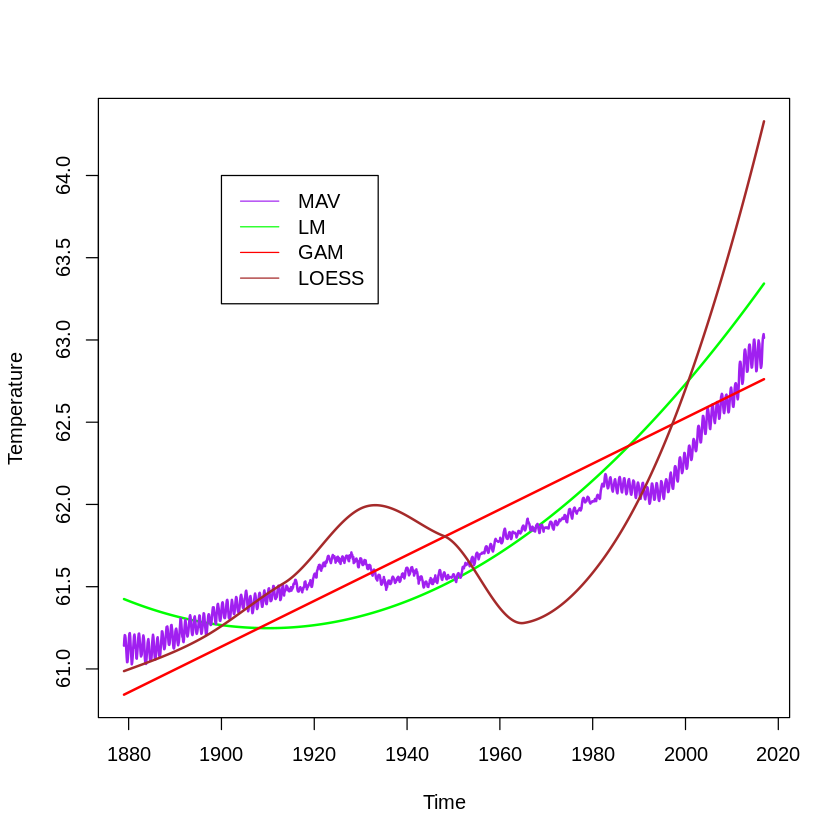

In [24]:
## Compare all estimated trends
all.val = c(temp.fit.mav,temp.fit.lm,temp.fit.gam,temp.fit.loc)
ylim= c(min(all.val),max(all.val))
ts.plot(temp.fit.lm,lwd=2,col="green",ylim=ylim,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
lines(temp.fit.gam,lwd=2,col="red")
lines(temp.fit.loc,lwd=2,col="brown")
legend(x=1900,y=64,legend=c("MAV","LM","GAM","LOESS"),lty = 1, col=c("purple","green","red","brown"))

# Seasonal Estimation

## Estimating Seasonality using ANOVA (parametric using dummy variables)

In [30]:
#install.packages('TSA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’




In [31]:
#Load the Library
library(TSA)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [32]:
month= season(temp)

estimation seasonal components using intercept

In [34]:
model1=lm(temp~month)

In [35]:
summary(model1)


Call:
lm(formula = temp ~ month)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     43.2072     0.2725 158.534  < 2e-16 ***
monthFebruary    2.7514     0.3854   7.139 1.41e-12 ***
monthMarch      10.0232     0.3854  26.005  < 2e-16 ***
monthApril      18.4014     0.3854  47.742  < 2e-16 ***
monthMay        26.5623     0.3854  68.916  < 2e-16 ***
monthJune       33.4913     0.3854  86.893  < 2e-16 ***
monthJuly       35.7978     0.3854  92.877  < 2e-16 ***
monthAugust     35.0630     0.3854  90.971  < 2e-16 ***
monthSeptember  30.0913     0.3854  78.071  < 2e-16 ***
monthOctober    19.7543     0.3854  51.252  < 2e-16 ***
monthNovember    9.3420     0.3854  24.238  < 2e-16 ***
monthDecember    1.8652     0.3854   4.839 1.43e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.202 on 1644 degrees of f

Estimation seasonal components without intercept

In [36]:
model2=lm(temp~month-1)
summary(model2)


Call:
lm(formula = temp ~ month - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
monthJanuary    43.2072     0.2725   158.5   <2e-16 ***
monthFebruary   45.9587     0.2725   168.6   <2e-16 ***
monthMarch      53.2304     0.2725   195.3   <2e-16 ***
monthApril      61.6087     0.2725   226.1   <2e-16 ***
monthMay        69.7696     0.2725   256.0   <2e-16 ***
monthJune       76.6986     0.2725   281.4   <2e-16 ***
monthJuly       79.0051     0.2725   289.9   <2e-16 ***
monthAugust     78.2703     0.2725   287.2   <2e-16 ***
monthSeptember  73.2986     0.2725   268.9   <2e-16 ***
monthOctober    62.9616     0.2725   231.0   <2e-16 ***
monthNovember   52.5493     0.2725   192.8   <2e-16 ***
monthDecember   45.0725     0.2725   165.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.202 on 1644 degrees 

## 2- Estimation od seasonality using COS-SIN- HARMONIC 

In [37]:
har=harmonic(temp,1)
model3=lm(temp~har)
summary(model3)



Call:
lm(formula = temp ~ har)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2003  -2.0059  -0.2022   2.0005  12.4493 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     61.80254    0.08133  759.870  < 2e-16 ***
harcos(2*pi*t) -18.30228    0.11502 -159.119  < 2e-16 ***
harsin(2*pi*t)  -0.69366    0.11502   -6.031 2.01e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.31 on 1653 degrees of freedom
Multiple R-squared:  0.9388,	Adjusted R-squared:  0.9387 
F-statistic: 1.268e+04 on 2 and 1653 DF,  p-value: < 2.2e-16


In [39]:
har=harmonic(temp,2)
model4=lm(temp~har)
summary(model4)


Call:
lm(formula = temp ~ har)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5699  -2.0031  -0.1105   1.9524  12.5301 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     61.80254    0.07888  783.490  < 2e-16 ***
harcos(2*pi*t) -18.30228    0.11155 -164.065  < 2e-16 ***
harcos(4*pi*t)  -0.63031    0.11155   -5.650 1.88e-08 ***
harsin(2*pi*t)  -0.69366    0.11155   -6.218 6.36e-10 ***
harsin(4*pi*t)   0.96246    0.11155    8.628  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.21 on 1651 degrees of freedom
Multiple R-squared:  0.9425,	Adjusted R-squared:  0.9424 
F-statistic:  6766 on 4 and 1651 DF,  p-value: < 2.2e-16


Compare between seasonality estimation

In [40]:
st1= coef(model2)

st2= fitted(model4)[1:12]

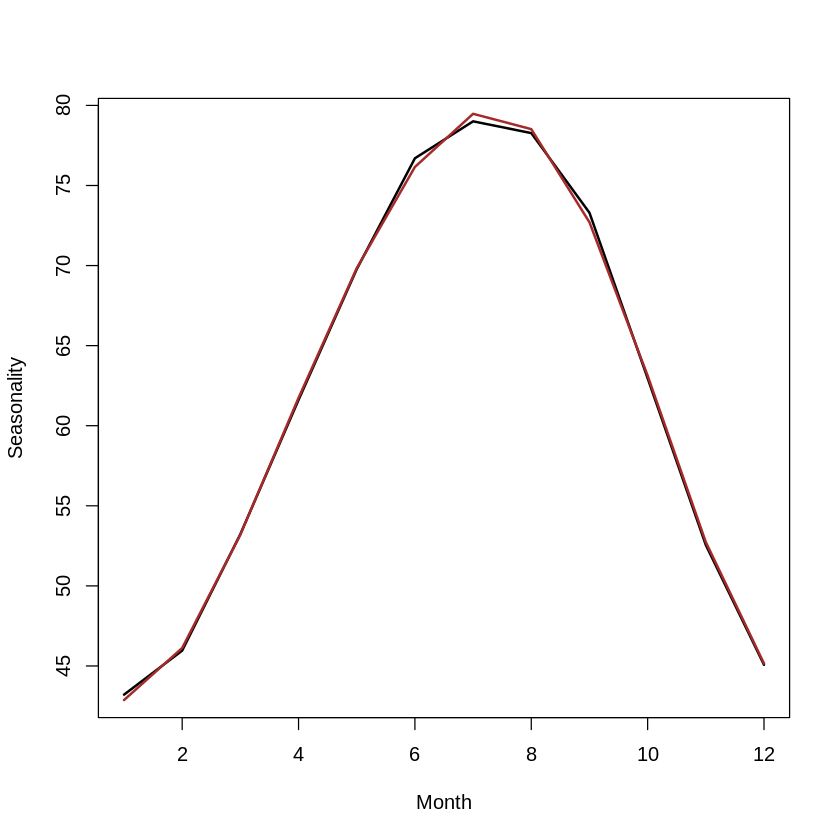

In [41]:

plot(1:12,st1,lwd=2,type="l",xlab="Month",ylab="Seasonality")
lines(1:12,st2,lwd=2, col="brown")

## 3- Joint modelling of seasonal and trend

In [42]:
x1 = time.pts # t
x2 = time.pts^2 #t^2
har2=harmonic(temp,2)
lm.fit = lm(temp~x1+x2+har2)
summary(lm.fit)


Call:
lm(formula = temp ~ x1 + x2 + har2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8242  -1.9505  -0.1554   1.9744  12.7916 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.4620     0.2324  264.456  < 2e-16 ***
x1               -1.6526     1.0741   -1.538 0.124119    
x2                3.5021     1.0406    3.365 0.000782 ***
har2cos(2*pi*t) -18.3012     0.1097 -166.844  < 2e-16 ***
har2cos(4*pi*t)  -0.6292     0.1097   -5.736 1.15e-08 ***
har2sin(2*pi*t)  -0.6895     0.1097   -6.286 4.17e-10 ***
har2sin(4*pi*t)   0.9644     0.1097    8.792  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.156 on 1649 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9443 
F-statistic:  4675 on 6 and 1649 DF,  p-value: < 2.2e-16


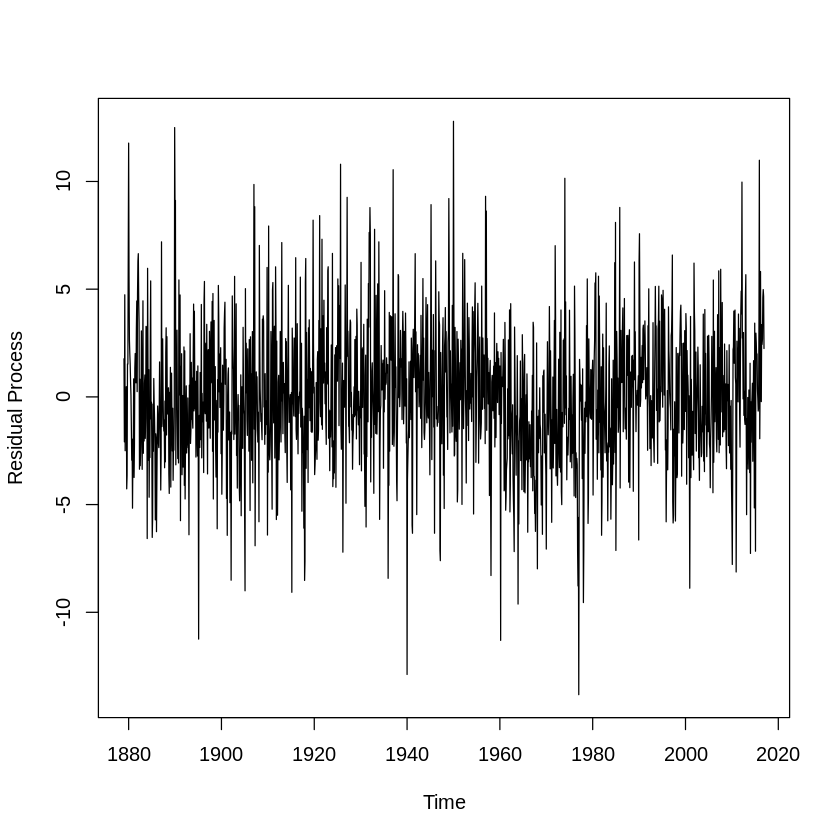

In [43]:

# calculate the residuals (Xt)


dif.fit.lm = ts((temp-fitted(lm.fit)),start=1879,frequency=12)
ts.plot(dif.fit.lm,ylab="Residual Process")



## Fit a non-parametric model for trend and linear model for seasonality

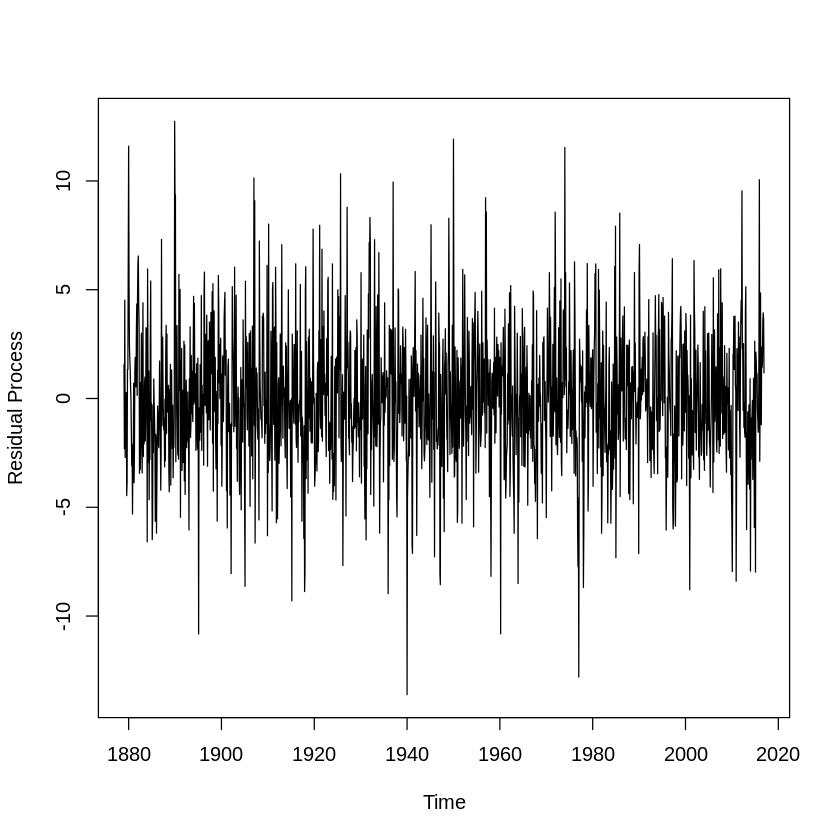

In [44]:

gam.fit = gam(temp~s(time.pts)+har2)
dif.fit.gam = ts((temp-fitted(gam.fit)),start=1879,frequency=12)
ts.plot(dif.fit.gam,ylab="Residual Process")


## Compare approaches

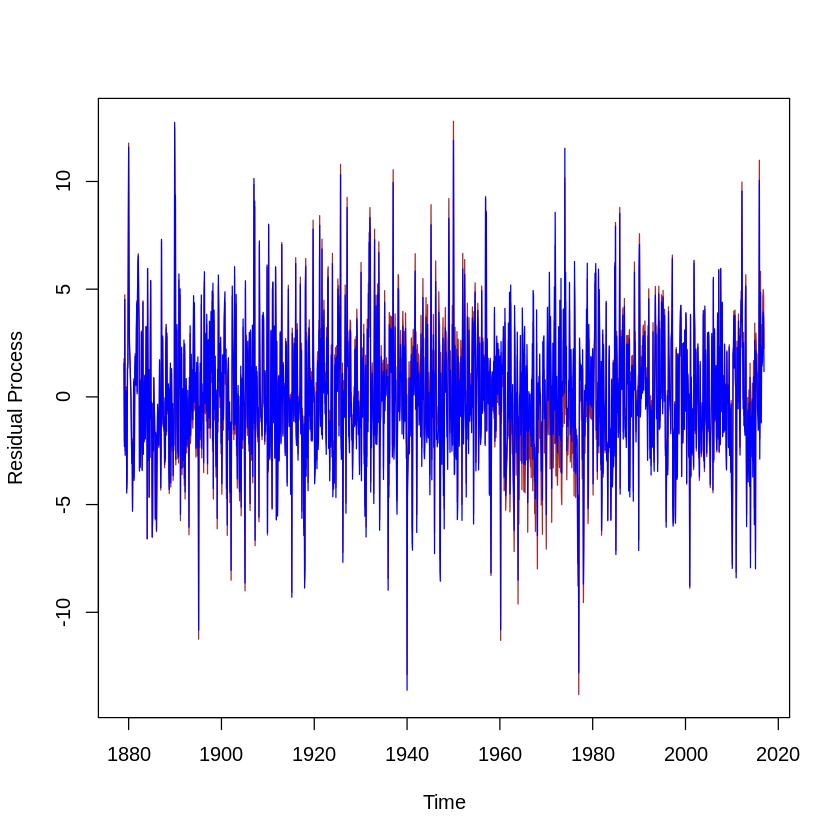

In [45]:

 
ts.plot(dif.fit.lm,ylab="Residual Process",col="brown")
lines(dif.fit.gam,col="blue")


